In [1]:
import pandas as pd 
import matplotlib.pyplot  as plt 
import seaborn as sns 
import sklearn 

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
pd.DataFrame(df.isnull().sum(),columns=['count of nan value']).T

,TV,Radio,Newspaper,Sales
count of nan value,0,0,0,0


In [17]:
X = df[['TV']]
Y = df[['Sales']]


In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=50)

In [19]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
b0 = model.intercept_[0] 
b1 = model.coef_[0][0]

print(f' sales = {b0} + {b1} x TV ')

 sales = 6.889929307794299 + 0.05671243947672504 x TV 


In [25]:
test_Tv= [ [120] ,[ 20] ,[1000] ]
model.predict(test_Tv)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13.69542205],
       [ 8.0241781 ],
       [63.60236878]])

In [37]:
y_pred = model.predict(x_test)
y_pred


array([[16.85430492],
       [20.18899637],
       [ 8.23968537],
       [14.22851898],
       [12.34566599],
       [19.27592609],
       [20.05288651],
       [ 7.37765629],
       [19.82036551],
       [11.89763771],
       [20.48957229],
       [16.9280311 ],
       [19.18518619],
       [16.67282512],
       [21.79962965],
       [14.55745113],
       [13.75213448],
       [19.83737924],
       [ 9.32856421],
       [14.35895759],
       [13.11695516],
       [11.160376  ],
       [10.42311429],
       [19.50277585],
       [22.41212399],
       [10.76906017],
       [12.01673384],
       [12.31730977],
       [17.37605937],
       [18.61806179],
       [13.87123061],
       [15.38545274],
       [ 7.84836953],
       [18.09630735],
       [11.22275968],
       [ 9.42497535],
       [12.71429684],
       [21.78828716],
       [11.83525403],
       [11.22275968]])

In [44]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")


Shape of y_test: (40, 1)
Shape of y_pred: (40, 1)


In [46]:
y_test_flat = y_test
y_pred_flat = y_pred
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")


Shape of y_test: (40, 1)
Shape of y_pred: (40, 1)


In [50]:
y_test_ = y_test.squeeze()
y_pred_ = y_pred.squeeze()
diff = pd.DataFrame({'Actual': y_test_, 'Prediction': y_pred_})
print("Difference DataFrame created successfully:")
print(diff.head())

Difference DataFrame created successfully:
     Actual  Prediction
112    17.1   16.854305
165    16.9   20.188996
12      9.2    8.239685
73     11.0   14.228519
144    12.3   12.345666


In [52]:
diff.head()

,Actual,Prediction
112,17.1,16.854305
165,16.9,20.188996
12,9.2,8.239685
73,11.0,14.228519
144,12.3,12.345666


In [53]:
import numpy as np 
from sklearn import metrics 

mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)



In [54]:
print(f"MAE {round(mae,2)}")
print(f"RMSE {round(rmse,2)}")

MAE 1.74
RMSE 2.16


<Axes: xlabel='TV', ylabel='Sales'>

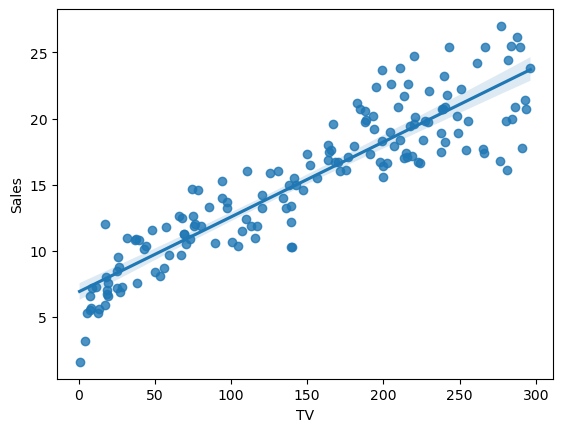

In [55]:
sns.regplot(x=x_train,y=y_train)

<Axes: xlabel='TV', ylabel='Sales'>

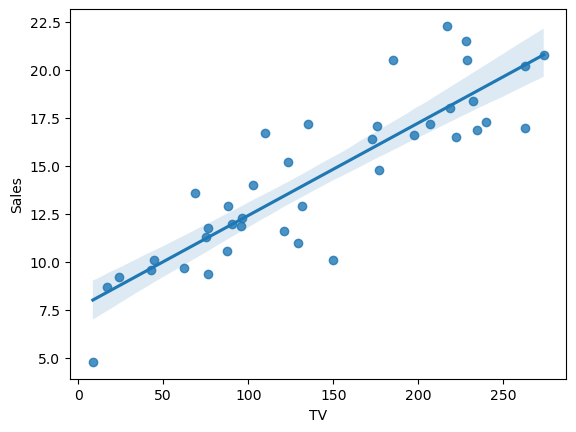

In [56]:
sns.regplot(x=x_test,y=y_test)